In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

```
0 티셔츠/탑
1 바지
2 풀오버(스웨터의 일종)
3 드레스
4 코트
5 샌들
6 셔츠
7 스니커즈
8 가방
9 앵클 부츠

```

In [33]:
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
session = InteractiveSession(config=config)

C:\Users\apollo\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\client\session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [34]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

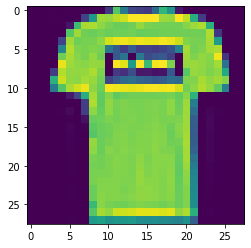

In [35]:
plt.imshow(x_train[1])

In [36]:
K = len(set(y_train))
K

10

In [37]:
x_train = np.expand_dims(x_train, -1)/255
x_test = np.expand_dims(x_test,-1)/255

In [38]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [39]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [40]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [41]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=[28, 28, 1]))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [43]:
history = model.fit(x_train, y_train, batch_size=128, epochs=4)

Epoch 1/4
469/469 [==============================] - 2s 4ms/step - loss: 0.5128 - accuracy: 0.8152
Epoch 2/4
469/469 [==============================] - 2s 4ms/step - loss: 0.3220 - accuracy: 0.8831
Epoch 3/4
469/469 [==============================] - 2s 4ms/step - loss: 0.2715 - accuracy: 0.9010
Epoch 4/4
469/469 [==============================] - 2s 4ms/step - loss: 0.2412 - accuracy: 0.9107


In [44]:
np.round(model.predict(x_test))[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [45]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [46]:
score = model.evaluate(x_test, y_test,
                       verbose=2)# verbose는 얼마나 정보를 자세하게 나타낼 것인가. 0,1,2 세가지로 나뉨
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 - 0s - loss: 0.2612 - accuracy: 0.9068
Test score: 0.26123902201652527
Test accuracy: 0.9067999720573425


In [47]:
model.predict(x_test)[0]

array([1.03532454e-06, 6.99408531e-08, 1.57356332e-08, 6.65177595e-07,
       5.71972940e-08, 1.46730454e-04, 4.96766518e-07, 1.25915045e-03,
       1.11474355e-05, 9.98580575e-01], dtype=float32)

In [48]:
model.predict(x_test).argmax(axis=1)
#softmax 로 나온 결과를 원래 결과로 되돌려주기 위한 방법

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [50]:
# Plot confusion matrix 를 통해 맞는값들과 틀린값들을 비교해 보자. 
from sklearn.metrics import confusion_matrix
p_test = model.predict(x_test).argmax(axis=1)
y_test = y_test.argmax(axis=1)
confusion_matrix(y_test, p_test)

AxisError: axis 1 is out of bounds for array of dimension 1

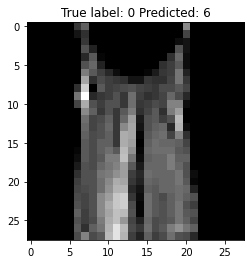

In [51]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
x_test = x_test.reshape(10000, 28,28)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

In [ ]:
model.summary()